In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [215]:
PATH = "../datasets/tradhist.csv"
df = pd.read_csv(PATH)

/var/folders/qc/xp9q1kcj79315fgc2jdgwtv00000gn/T/ipykernel_8524/562444793.py:2: DtypeWarning: Columns (8,12,14,21,24,28,33,45,46,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH)


In [216]:
df_new = df.loc[(df["iso_o"] == "USA") & (df["iso_d"] == "CHN")]

In [217]:
features = ['GDP_o', 'GDP_d', 'POP_o','POP_d',
            'Distw', 'Comlang', 'Contig', 'XPTOT_o', 'IPTOT_d', 'IPTOT_o', 'XPTOT_d'
    , "year", "FLOW"]

In [218]:
df_new = df_new[features]

In [219]:
df_new = df_new.dropna()
df_new

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,XPTOT_o,IPTOT_d,IPTOT_o,XPTOT_d,year,FLOW
2332099,9.577647e+08,2.716856e+09,35192.434,369281.9,11183.428123,0.0,0.0,1.444320e+07,1.350781e+07,3.189540e+07,1.766651e+07,1864,1.041224e+06
2332100,1.297010e+09,1.974545e+09,36031.387,367377.2,11183.428123,0.0,0.0,1.781000e+07,1.932630e+07,3.146000e+07,1.876707e+07,1865,1.508103e+05
2332101,1.320378e+09,2.091302e+09,36869.367,365482.3,11183.428123,0.0,0.0,4.914520e+07,2.333031e+07,6.368520e+07,1.757253e+07,1866,9.068586e+04
2332102,1.247594e+09,1.674092e+09,37708.380,363597.2,11183.428123,0.0,0.0,4.146800e+07,2.137470e+07,5.938810e+07,1.784953e+07,1867,2.166406e+05
2332103,1.204816e+09,1.435407e+09,38546.414,361721.8,11183.428123,0.0,0.0,3.940850e+07,2.160084e+07,5.303300e+07,2.099144e+07,1868,2.531170e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332245,9.684627e+12,3.908740e+12,309346.880,1337705.0,11183.428123,0.0,0.0,8.267647e+11,9.021093e+11,1.273726e+12,1.160983e+12,2010,6.598572e+10
2332246,9.685374e+12,4.676334e+12,311718.840,1344130.0,11183.428123,0.0,0.0,9.252765e+11,1.086898e+12,1.378072e+12,1.285863e+12,2011,7.437514e+10
2332247,1.022704e+13,5.356605e+12,314102.620,1350695.0,11183.428123,0.0,0.0,9.785577e+11,1.150462e+12,1.440980e+12,1.356310e+12,2012,8.143390e+10
2332248,1.065877e+13,6.070768e+12,316427.400,1357380.0,11183.428123,0.0,0.0,1.009660e+12,1.246891e+12,1.450988e+12,1.428233e+12,2013,9.401673e+10


In [220]:
df_new.set_index("year")

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,XPTOT_o,IPTOT_d,IPTOT_o,XPTOT_d,FLOW
year,,,,,,,,,,,,
1864,9.577647e+08,2.716856e+09,35192.434,369281.9,11183.428123,0.0,0.0,1.444320e+07,1.350781e+07,3.189540e+07,1.766651e+07,1.041224e+06
1865,1.297010e+09,1.974545e+09,36031.387,367377.2,11183.428123,0.0,0.0,1.781000e+07,1.932630e+07,3.146000e+07,1.876707e+07,1.508103e+05
1866,1.320378e+09,2.091302e+09,36869.367,365482.3,11183.428123,0.0,0.0,4.914520e+07,2.333031e+07,6.368520e+07,1.757253e+07,9.068586e+04
1867,1.247594e+09,1.674092e+09,37708.380,363597.2,11183.428123,0.0,0.0,4.146800e+07,2.137470e+07,5.938810e+07,1.784953e+07,2.166406e+05
1868,1.204816e+09,1.435407e+09,38546.414,361721.8,11183.428123,0.0,0.0,3.940850e+07,2.160084e+07,5.303300e+07,2.099144e+07,2.531170e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
2010,9.684627e+12,3.908740e+12,309346.880,1337705.0,11183.428123,0.0,0.0,8.267647e+11,9.021093e+11,1.273726e+12,1.160983e+12,6.598572e+10
2011,9.685374e+12,4.676334e+12,311718.840,1344130.0,11183.428123,0.0,0.0,9.252765e+11,1.086898e+12,1.378072e+12,1.285863e+12,7.437514e+10
2012,1.022704e+13,5.356605e+12,314102.620,1350695.0,11183.428123,0.0,0.0,9.785577e+11,1.150462e+12,1.440980e+12,1.356310e+12,8.143390e+10


In [221]:
df_new = df_new.loc[df_new["year"] > 2000]

In [222]:
df_new

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,XPTOT_o,IPTOT_d,IPTOT_o,XPTOT_d,year,FLOW
2332236,7.378503e+12,9.254435e+11,284968.97,1271850.0,11183.428123,0.0,0.0,5.301281e+11,1.691950e+11,8.198111e+11,2.822862e+11,2001,1.821455e+10
2332237,7.324450e+12,9.754176e+11,287625.20,1280400.0,11183.428123,0.0,0.0,4.876326e+11,1.971244e+11,8.022755e+11,3.161568e+11,2002,1.818276e+10
2332238,7.049963e+12,1.010535e+12,290107.94,1288400.0,11183.428123,0.0,0.0,4.671654e+11,2.528505e+11,7.994658e+11,3.647914e+11,2003,2.078663e+10
2332239,6.704321e+12,1.060543e+12,292805.30,1296075.0,11183.428123,0.0,0.0,4.692705e+11,3.063038e+11,8.331812e+11,4.272286e+11,2004,2.443822e+10
2332240,7.201523e+12,1.247725e+12,295516.60,1303720.0,11183.428123,0.0,0.0,5.131972e+11,3.631191e+11,9.528826e+11,5.384827e+11,2005,2.694688e+10
2332241,7.530495e+12,1.483602e+12,298379.90,1311020.0,11183.428123,0.0,0.0,5.636124e+11,4.303292e+11,1.043082e+12,6.415434e+11,2006,3.224296e+10
2332242,7.235517e+12,1.760744e+12,301231.22,1317885.0,11183.428123,0.0,0.0,5.810549e+11,4.779125e+11,1.008230e+12,7.191396e+11,2007,3.498284e+10
2332243,8.006408e+12,2.479631e+12,304093.97,1324655.0,11183.428123,0.0,0.0,7.071993e+11,6.157260e+11,1.178219e+12,8.980015e+11,2008,4.445431e+10
2332244,9.255663e+12,3.247738e+12,306771.53,1331260.0,11183.428123,0.0,0.0,6.784442e+11,6.444161e+11,1.029349e+12,9.063443e+11,2009,4.992364e+10
2332245,9.684627e+12,3.908740e+12,309346.88,1337705.0,11183.428123,0.0,0.0,8.267647e+11,9.021093e+11,1.273726e+12,1.160983e+12,2010,6.598572e+10


In [223]:
df_new = df_new.set_index("year")

In [224]:
df_new

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,XPTOT_o,IPTOT_d,IPTOT_o,XPTOT_d,FLOW
year,,,,,,,,,,,,
2001,7.378503e+12,9.254435e+11,284968.97,1271850.0,11183.428123,0.0,0.0,5.301281e+11,1.691950e+11,8.198111e+11,2.822862e+11,1.821455e+10
2002,7.324450e+12,9.754176e+11,287625.20,1280400.0,11183.428123,0.0,0.0,4.876326e+11,1.971244e+11,8.022755e+11,3.161568e+11,1.818276e+10
2003,7.049963e+12,1.010535e+12,290107.94,1288400.0,11183.428123,0.0,0.0,4.671654e+11,2.528505e+11,7.994658e+11,3.647914e+11,2.078663e+10
2004,6.704321e+12,1.060543e+12,292805.30,1296075.0,11183.428123,0.0,0.0,4.692705e+11,3.063038e+11,8.331812e+11,4.272286e+11,2.443822e+10
2005,7.201523e+12,1.247725e+12,295516.60,1303720.0,11183.428123,0.0,0.0,5.131972e+11,3.631191e+11,9.528826e+11,5.384827e+11,2.694688e+10
2006,7.530495e+12,1.483602e+12,298379.90,1311020.0,11183.428123,0.0,0.0,5.636124e+11,4.303292e+11,1.043082e+12,6.415434e+11,3.224296e+10
2007,7.235517e+12,1.760744e+12,301231.22,1317885.0,11183.428123,0.0,0.0,5.810549e+11,4.779125e+11,1.008230e+12,7.191396e+11,3.498284e+10
2008,8.006408e+12,2.479631e+12,304093.97,1324655.0,11183.428123,0.0,0.0,7.071993e+11,6.157260e+11,1.178219e+12,8.980015e+11,4.445431e+10
2009,9.255663e+12,3.247738e+12,306771.53,1331260.0,11183.428123,0.0,0.0,6.784442e+11,6.444161e+11,1.029349e+12,9.063443e+11,4.992364e+10


# Augmented Dickey-Fuller Test

In [225]:
from statsmodels.tsa.stattools import adfuller

passing_data = adfuller(df_new.FLOW)
passing_data


def adf_test(sales):
    result = adfuller(sales)
    labels = ['Test parameters', 'p-value', '#Lags Used', 'Dataset observations']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")


adf_test(df_new['FLOW'])

Test parameters : 2.330858815841947
p-value : 0.99897396224656
#Lags Used : 5
Dataset observations : 8
Dataset is non-stationary 


AttributeError: 'Figure' object has no attribute 'plot'

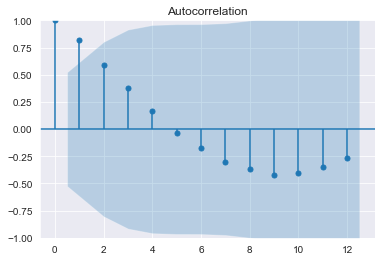

In [226]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(df_new.FLOW, lags=12).plot()

/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


AttributeError: 'Figure' object has no attribute 'plot'

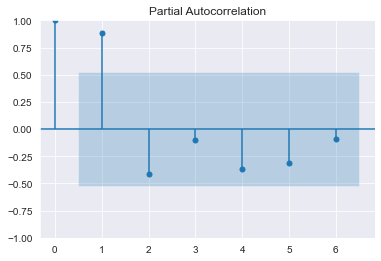

In [227]:
sm.graphics.tsa.plot_pacf(df_new.FLOW, lags=6).plot()

In [228]:
df_new.index = pd.to_datetime(df_new.index, format="%Y")

In [229]:
df_new

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,XPTOT_o,IPTOT_d,IPTOT_o,XPTOT_d,FLOW
year,,,,,,,,,,,,
2001-01-01,7.378503e+12,9.254435e+11,284968.97,1271850.0,11183.428123,0.0,0.0,5.301281e+11,1.691950e+11,8.198111e+11,2.822862e+11,1.821455e+10
2002-01-01,7.324450e+12,9.754176e+11,287625.20,1280400.0,11183.428123,0.0,0.0,4.876326e+11,1.971244e+11,8.022755e+11,3.161568e+11,1.818276e+10
2003-01-01,7.049963e+12,1.010535e+12,290107.94,1288400.0,11183.428123,0.0,0.0,4.671654e+11,2.528505e+11,7.994658e+11,3.647914e+11,2.078663e+10
2004-01-01,6.704321e+12,1.060543e+12,292805.30,1296075.0,11183.428123,0.0,0.0,4.692705e+11,3.063038e+11,8.331812e+11,4.272286e+11,2.443822e+10
2005-01-01,7.201523e+12,1.247725e+12,295516.60,1303720.0,11183.428123,0.0,0.0,5.131972e+11,3.631191e+11,9.528826e+11,5.384827e+11,2.694688e+10
2006-01-01,7.530495e+12,1.483602e+12,298379.90,1311020.0,11183.428123,0.0,0.0,5.636124e+11,4.303292e+11,1.043082e+12,6.415434e+11,3.224296e+10
2007-01-01,7.235517e+12,1.760744e+12,301231.22,1317885.0,11183.428123,0.0,0.0,5.810549e+11,4.779125e+11,1.008230e+12,7.191396e+11,3.498284e+10
2008-01-01,8.006408e+12,2.479631e+12,304093.97,1324655.0,11183.428123,0.0,0.0,7.071993e+11,6.157260e+11,1.178219e+12,8.980015e+11,4.445431e+10
2009-01-01,9.255663e+12,3.247738e+12,306771.53,1331260.0,11183.428123,0.0,0.0,6.784442e+11,6.444161e+11,1.029349e+12,9.063443e+11,4.992364e+10


In [332]:
exogenous_numeric = df_new[["GDP_d", "XPTOT_o"]]

In [333]:
exogenous_numeric = np.log(exogenous_numeric)

In [334]:
exogenous_numeric

,GDP_d,XPTOT_o
year,,
2001-01-01,27.553539,26.996385
2002-01-01,27.606132,26.912828
2003-01-01,27.641501,26.869949
2004-01-01,27.689802,26.874445
2005-01-01,27.852343,26.963926
2006-01-01,28.025494,27.057633
2007-01-01,28.196758,27.088111
2008-01-01,28.539131,27.284578
2009-01-01,28.808980,27.243068


In [335]:
model = ARIMA(np.log(df_new.FLOW.iloc[:10]), order=(2,1,2), exog=exogenous_numeric.iloc[:10])

/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [336]:
arimax_model = model.fit()

/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [337]:
df_new['forecast'] = arimax_model.predict(start=10, end=15, dynamic=True,
                                          exog=exogenous_numeric.iloc[8:15])
df_new.forecast = np.exp(df_new.forecast)
df_new

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,XPTOT_o,IPTOT_d,IPTOT_o,XPTOT_d,FLOW,forecast
year,,,,,,,,,,,,,
2001-01-01,7.378503e+12,9.254435e+11,284968.97,1271850.0,11183.428123,0.0,0.0,5.301281e+11,1.691950e+11,8.198111e+11,2.822862e+11,1.821455e+10,NaN
2002-01-01,7.324450e+12,9.754176e+11,287625.20,1280400.0,11183.428123,0.0,0.0,4.876326e+11,1.971244e+11,8.022755e+11,3.161568e+11,1.818276e+10,NaN
2003-01-01,7.049963e+12,1.010535e+12,290107.94,1288400.0,11183.428123,0.0,0.0,4.671654e+11,2.528505e+11,7.994658e+11,3.647914e+11,2.078663e+10,NaN
2004-01-01,6.704321e+12,1.060543e+12,292805.30,1296075.0,11183.428123,0.0,0.0,4.692705e+11,3.063038e+11,8.331812e+11,4.272286e+11,2.443822e+10,NaN
2005-01-01,7.201523e+12,1.247725e+12,295516.60,1303720.0,11183.428123,0.0,0.0,5.131972e+11,3.631191e+11,9.528826e+11,5.384827e+11,2.694688e+10,NaN
2006-01-01,7.530495e+12,1.483602e+12,298379.90,1311020.0,11183.428123,0.0,0.0,5.636124e+11,4.303292e+11,1.043082e+12,6.415434e+11,3.224296e+10,NaN
2007-01-01,7.235517e+12,1.760744e+12,301231.22,1317885.0,11183.428123,0.0,0.0,5.810549e+11,4.779125e+11,1.008230e+12,7.191396e+11,3.498284e+10,NaN
2008-01-01,8.006408e+12,2.479631e+12,304093.97,1324655.0,11183.428123,0.0,0.0,7.071993e+11,6.157260e+11,1.178219e+12,8.980015e+11,4.445431e+10,NaN
2009-01-01,9.255663e+12,3.247738e+12,306771.53,1331260.0,11183.428123,0.0,0.0,6.784442e+11,6.444161e+11,1.029349e+12,9.063443e+11,4.992364e+10,NaN


<AxesSubplot:xlabel='year'>

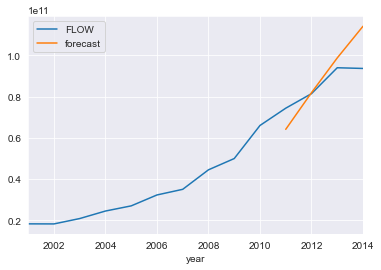

In [338]:
df_new[["FLOW", "forecast"]].plot()

In [339]:
df_result = df_new.iloc[10:14]
df_result
from sklearn.metrics import r2_score

r2_score(df_result['forecast'], df_result['FLOW'])

0.6073643886060325